# This notebook does some OLS modeling and Linear Support Vector Classification for the features and the target variables in the final dataset

In [1]:
import pandas as pd
import seaborn
import pylab as pl
import statsmodels.formula.api as smf
from sklearn import datasets
from sklearn.decomposition import PCA

%pylab inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("all_data_modeling.csv")

In [3]:
df.head()

,Unnamed: 0,zipcode,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,...,pv_change_area,sub_change_area,taxi_change_area,fhv_change_area,log_fhv_taxi_change,renovation_index_with_rent,business_renewal,rent_increase,new_building_tbp,major_renovation_tbp
0,0,10001,-6.799685e-06,-7.715676e-05,-9.553277e-07,-0.005399,-0.061259,-0.000758,-0.478261,-0.402994,...,-0.180106,-0.833415,-0.169423,-0.000070,-1.376286,12.446914,0.533825,0.117905,0.050109,0.037876
1,1,10002,2.435300e-06,8.751860e-07,-4.946703e-07,0.000787,0.000283,-0.000160,0.205788,0.027545,...,-0.034884,0.027568,-0.040357,0.006078,2.194057,10.818387,0.473819,0.128549,0.055533,0.048182
2,2,10003,-9.138664e-06,-2.117338e-05,-8.366383e-07,-0.002541,-0.005888,-0.000233,-0.614719,-0.178030,...,-0.204036,-0.372674,-0.218571,0.031182,1.403509,6.758775,0.420635,0.165324,0.012487,0.041865
3,3,10004,6.246063e-06,1.773882e-05,1.499055e-06,0.011431,0.032465,0.002743,5.000000,0.572581,...,-0.032957,2.800295,-0.047086,0.004811,3.696351,9.302646,0.496063,0.160638,0.010390,0.021935
4,4,10005,9.601992e-07,4.320896e-06,1.440299e-06,0.000247,0.001110,0.000370,1.000000,0.101124,...,-0.136417,-3.080543,-0.161191,0.017093,2.731062,8.584642,0.388889,0.109913,0.000870,0.027834


In [4]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'drug_change_area', 'larceny_change_area',
       'robbery_change_area', 'drug_change_pop', 'larceny_change_pop',
       'robbery_change_pop', 'drug_change_rate', 'petit_larceny_change_rate',
       'robbery_change_rate', 'SS_change_rate', 'H_change_rate',
       'N_change_rate', 'T_change_rate', 'PHS_change_rate', 'VP_change_rate',
       'SS_change_pop', 'H_change_pop', 'N_change_pop', 'T_change_pop',
       'PHS_change_pop', 'VP_change_pop', 'SS_change_area', 'H_change_area',
       'N_change_area', 'T_change_area', 'PHS_change_area', 'VP_change_area',
       'MasterCard_growth_rank', 'pv_change_area', 'sub_change_area',
       'taxi_change_area', 'fhv_change_area', 'log_fhv_taxi_change',
       'renovation_index_with_rent', 'business_renewal', 'rent_increase',
       'new_building_tbp', 'major_renovation_tbp'],
      dtype='object')

# First we run some OLS models including all variables to see our maximum R Squared for all of our target variables

In [5]:
lm = smf.ols('renovation_index_with_rent ~ log_fhv_taxi_change + fhv_change_area + taxi_change_area + sub_change_area  + pv_change_area + MasterCard_growth_rank + VP_change_area + PHS_change_area + T_change_area + N_change_area +H_change_area+SS_change_area+VP_change_pop+PHS_change_pop+T_change_pop+N_change_pop+H_change_pop+SS_change_pop+VP_change_rate+PHS_change_rate+T_change_rate+N_change_rate+H_change_rate+SS_change_rate+robbery_change_rate+petit_larceny_change_rate+drug_change_rate+robbery_change_pop+larceny_change_pop+drug_change_pop+robbery_change_area+larceny_change_area+drug_change_area',data=df).fit()


lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     renovation_index_with_rent   R-squared:                       0.430
Model:                                    OLS   Adj. R-squared:                  0.300
Method:                         Least Squares   F-statistic:                     3.296
Date:                        Mon, 16 Jul 2018   Prob (F-statistic):           4.60e-07
Time:                                13:19:01   Log-Likelihood:                -674.26
No. Observations:                         178   AIC:                             1417.
Df Residuals:                             144   BIC:                             1525.
Df Model:                                  33                                         
Covariance Type:                    nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                    15.3563      6.206      2.474      0.015         3.090    27.623
log_fhv_taxi_change          -0.6997      0.758     -0.924      0.357        -2.197     0.798
fhv_change_area             243.8847     89.484      2.725      0.007        67.013   420.756
taxi_change_area            266.2049     79.959      3.329      0.001       108.161   424.249
sub_change_area              -0.9174      1.782     -0.515      0.607        -4.440     2.605
pv_change_area             -162.8661     64.483     -2.526      0.013      -290.322   -35.410
MasterCard_growth_rank        0.0085      0.012      0.700      0.485        -0.015     0.032
VP_change_area               -0.6981      0.747     -0.934      0.352        -2.176     0.779
PHS_change_area               2.1818      0.708      3.082      0.002         0.782     3.581
T_change_area                 0.1113      0.421      0.264      0.792        -0.721     0.944
N_change_area                -0.2447      0.213     -1.149      0.252        -0.666     0.176
H_change_area                -2.4942      1.952     -1.278      0.203        -6.353     1.364
SS_change_area               -0.2682      0.555     -0.483      0.630        -1.366     0.829
VP_change_pop                 0.2641      0.793      0.333      0.740        -1.303     1.831
PHS_change_pop               -0.2650      0.355     -0.747      0.456        -0.966     0.436
T_change_pop                  0.4206      0.679      0.620      0.537        -0.921     1.763
N_change_pop                 -0.0314      0.491     -0.064      0.949        -1.002     0.940
H_change_pop                  6.4577      3.835      1.684      0.094        -1.123    14.039
SS_change_pop                -0.6344      0.606     -1.047      0.297        -1.832     0.563
VP_change_rate                3.3326      1.363      2.446      0.016         0.639     6.026
PHS_change_rate              -3.5556      1.654     -2.150      0.033        -6.824    -0.287
T_change_rate                -3.7387      1.889     -1.979      0.050        -7.472    -0.005
N_change_rate                 2.9429      0.800      3.679      0.000         1.362     4.524
H_change_rate                -0.5565      1.101     -0.505      0.614        -2.733     1.620
SS_change_rate                8.0328      4.087      1.965      0.051        -0.046    16.112
robbery_change_rate           0.2198      5.583      0.039      0.969       -10.816    11.256
petit_larceny_change_rate     2.1496      2.861      0.751      0.454        -3.506     7.806
drug_change_rate              0.0616      1.506      0.041      0.967        -2.915     3.038
robbery_change_pop          875.1632   3984.616      0.220      0.826     -7000.7

In [6]:
lm1 = smf.ols('business_renewal ~ log_fhv_taxi_change + fhv_change_area + taxi_change_area + sub_change_area  + pv_change_area + MasterCard_growth_rank + VP_change_area + PHS_change_area + T_change_area + N_change_area +H_change_area+SS_change_area+VP_change_pop+PHS_change_pop+T_change_pop+N_change_pop+H_change_pop+SS_change_pop+VP_change_rate+PHS_change_rate+T_change_rate+N_change_rate+H_change_rate+SS_change_rate+robbery_change_rate+petit_larceny_change_rate+drug_change_rate+robbery_change_pop+larceny_change_pop+drug_change_pop+robbery_change_area+larceny_change_area+drug_change_area',data=df).fit()


lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_renewal   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     9.366
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           2.64e-22
Time:                        13:19:01   Log-Likelihood:                 200.16
No. Observations:                 178   AIC:                            -332.3
Df Residuals:                     144   BIC:                            -224.1
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     0.3080      0.046      6.750      0.000         0.218     0.398
log_fhv_taxi_change           0.0037      0.006      0.672      0.502        -0.007     0.015
fhv_change_area               0.7101      0.658      1.079      0.282        -0.591     2.011
taxi_change_area              0.6941      0.588      1.180      0.240        -0.468     1.856
sub_change_area               0.0162      0.013      1.238      0.218        -0.010     0.042
pv_change_area               -0.5926      0.474     -1.250      0.213        -1.530     0.345
MasterCard_growth_rank        0.0003    8.9e-05      3.082      0.002      9.83e-05     0.000
VP_change_area               -0.0040      0.005     -0.730      0.467        -0.015     0.007
PHS_change_area              -0.0017      0.005     -0.330      0.742        -0.012     0.009
T_change_area                 0.0096      0.003      3.088      0.002         0.003     0.016
N_change_area                 0.0012      0.002      0.789      0.431        -0.002     0.004
H_change_area                -0.0405      0.014     -2.822      0.005        -0.069    -0.012
SS_change_area             7.289e-05      0.004      0.018      0.986        -0.008     0.008
VP_change_pop                -0.0030      0.006     -0.511      0.610        -0.015     0.009
PHS_change_pop                0.0004      0.003      0.169      0.866        -0.005     0.006
T_change_pop                 -0.0084      0.005     -1.685      0.094        -0.018     0.001
N_change_pop                  0.0023      0.004      0.633      0.528        -0.005     0.009
H_change_pop                  0.0679      0.028      2.406      0.017         0.012     0.124
SS_change_pop                -0.0011      0.004     -0.242      0.809        -0.010     0.008
VP_change_rate                0.0297      0.010      2.965      0.004         0.010     0.050
PHS_change_rate               0.0124      0.012      1.019      0.310        -0.012     0.036
T_change_rate                 0.0067      0.014      0.479      0.632        -0.021     0.034
N_change_rate                -0.0142      0.006     -2.422      0.017        -0.026    -0.003
H_change_rate                -0.0016      0.008     -0.193      0.847        -0.018     0.014
SS_change_rate                0.0011      0.030      0.036      0.971        -0.058     0.061
robbery_change_rate          -0.0128      0.041     -0.312      0.755        -0.094     0.068
petit_larceny_change_rate    -0.0281      0.021     -1.336      0.184        -0.070     0.013
drug_change_rate             -0.0092      0.011     -0.828      0.409        -0.031     0.013
robbery_change_pop           17.5621     29.303      0.599      0.550       -40.358    75.482
larceny_change_pop            2.4505      3.545      0.691      0.490      

In [7]:
lm2 = smf.ols('rent_increase ~ log_fhv_taxi_change + fhv_change_area + taxi_change_area + sub_change_area  + pv_change_area + MasterCard_growth_rank + VP_change_area + PHS_change_area + T_change_area + N_change_area +H_change_area+SS_change_area+VP_change_pop+PHS_change_pop+T_change_pop+N_change_pop+H_change_pop+SS_change_pop+VP_change_rate+PHS_change_rate+T_change_rate+N_change_rate+H_change_rate+SS_change_rate+robbery_change_rate+petit_larceny_change_rate+drug_change_rate+robbery_change_pop+larceny_change_pop+drug_change_pop+robbery_change_area+larceny_change_area+drug_change_area',data=df).fit()


lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          rent_increase   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1.883
Date:                Mon, 16 Jul 2018   Prob (F-statistic):            0.00595
Time:                        13:19:01   Log-Likelihood:                 243.64
No. Observations:                 178   AIC:                            -419.3
Df Residuals:                     144   BIC:                            -311.1
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     0.1838      0.036      5.141      0.000         0.113     0.254
log_fhv_taxi_change           0.0006      0.004      0.127      0.899        -0.008     0.009
fhv_change_area               0.3232      0.515      0.627      0.532        -0.696     1.342
taxi_change_area              0.5612      0.461      1.218      0.225        -0.349     1.472
sub_change_area              -0.0124      0.010     -1.205      0.230        -0.033     0.008
pv_change_area               -0.1806      0.371     -0.486      0.628        -0.915     0.554
MasterCard_growth_rank    -5.913e-07   6.97e-05     -0.008      0.993        -0.000     0.000
VP_change_area                0.0011      0.004      0.246      0.806        -0.007     0.010
PHS_change_area               0.0027      0.004      0.652      0.515        -0.005     0.011
T_change_area                -0.0050      0.002     -2.058      0.041        -0.010    -0.000
N_change_area                 0.0004      0.001      0.349      0.727        -0.002     0.003
H_change_area                -0.0366      0.011     -3.256      0.001        -0.059    -0.014
SS_change_area               -0.0002      0.003     -0.073      0.942        -0.007     0.006
VP_change_pop                -0.0048      0.005     -1.046      0.297        -0.014     0.004
PHS_change_pop                0.0012      0.002      0.572      0.568        -0.003     0.005
T_change_pop                  0.0113      0.004      2.882      0.005         0.004     0.019
N_change_pop                 -0.0024      0.003     -0.834      0.406        -0.008     0.003
H_change_pop                  0.0707      0.022      3.201      0.002         0.027     0.114
SS_change_pop                -0.0058      0.003     -1.670      0.097        -0.013     0.001
VP_change_rate                0.0041      0.008      0.521      0.603        -0.011     0.020
PHS_change_rate              -0.0249      0.010     -2.614      0.010        -0.044    -0.006
T_change_rate                -0.0067      0.011     -0.614      0.540        -0.028     0.015
N_change_rate                 0.0067      0.005      1.458      0.147        -0.002     0.016
H_change_rate                 0.0078      0.006      1.226      0.222        -0.005     0.020
SS_change_rate                0.0414      0.024      1.757      0.081        -0.005     0.088
robbery_change_rate          -0.0372      0.032     -1.157      0.249        -0.101     0.026
petit_larceny_change_rate    -0.0051      0.016     -0.311      0.756        -0.038     0.027
drug_change_rate              0.0046      0.009      0.529      0.597        -0.013     0.022
robbery_change_pop            6.5643     22.953      0.286      0.775       -38.803    51.932
larceny_change_pop            4.3486      2.777      1.566      0.120      

In [8]:
lm3 = smf.ols('new_building_tbp ~ log_fhv_taxi_change + fhv_change_area + taxi_change_area + sub_change_area  + pv_change_area + MasterCard_growth_rank + VP_change_area + PHS_change_area + T_change_area + N_change_area +H_change_area+SS_change_area+VP_change_pop+PHS_change_pop+T_change_pop+N_change_pop+H_change_pop+SS_change_pop+VP_change_rate+PHS_change_rate+T_change_rate+N_change_rate+H_change_rate+SS_change_rate+robbery_change_rate+petit_larceny_change_rate+drug_change_rate+robbery_change_pop+larceny_change_pop+drug_change_pop+robbery_change_area+larceny_change_area+drug_change_area',data=df).fit()


lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       new_building_tbp   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     4.207
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           1.01e-09
Time:                        13:19:01   Log-Likelihood:                 214.27
No. Observations:                 178   AIC:                            -360.5
Df Residuals:                     144   BIC:                            -252.4
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     0.0990      0.042      2.347      0.020         0.016     0.182
log_fhv_taxi_change          -0.0008      0.005     -0.148      0.882        -0.011     0.009
fhv_change_area               0.1344      0.608      0.221      0.825        -1.067     1.336
taxi_change_area              0.8656      0.543      1.593      0.113        -0.208     1.939
sub_change_area              -0.0029      0.012     -0.236      0.813        -0.027     0.021
pv_change_area               -0.2033      0.438     -0.464      0.643        -1.069     0.663
MasterCard_growth_rank      8.94e-05   8.22e-05      1.088      0.278      -7.3e-05     0.000
VP_change_area               -0.0042      0.005     -0.832      0.407        -0.014     0.006
PHS_change_area            8.804e-05      0.005      0.018      0.985        -0.009     0.010
T_change_area                -0.0011      0.003     -0.402      0.688        -0.007     0.005
N_change_area                -0.0004      0.001     -0.254      0.800        -0.003     0.002
H_change_area                 0.0175      0.013      1.319      0.189        -0.009     0.044
SS_change_area                0.0014      0.004      0.360      0.719        -0.006     0.009
VP_change_pop                 0.0010      0.005      0.185      0.854        -0.010     0.012
PHS_change_pop               -0.0039      0.002     -1.615      0.109        -0.009     0.001
T_change_pop                 -0.0005      0.005     -0.118      0.906        -0.010     0.009
N_change_pop                 -0.0034      0.003     -1.005      0.316        -0.010     0.003
H_change_pop                 -0.0275      0.026     -1.054      0.294        -0.079     0.024
SS_change_pop                 0.0027      0.004      0.667      0.506        -0.005     0.011
VP_change_rate                0.0282      0.009      3.044      0.003         0.010     0.046
PHS_change_rate               0.0008      0.011      0.074      0.941        -0.021     0.023
T_change_rate                -0.0158      0.013     -1.232      0.220        -0.041     0.010
N_change_rate                 0.0239      0.005      4.404      0.000         0.013     0.035
H_change_rate                -0.0018      0.007     -0.239      0.812        -0.017     0.013
SS_change_rate               -0.0230      0.028     -0.830      0.408        -0.078     0.032
robbery_change_rate          -0.0118      0.038     -0.310      0.757        -0.087     0.063
petit_larceny_change_rate    -0.0162      0.019     -0.835      0.405        -0.055     0.022
drug_change_rate              0.0039      0.010      0.377      0.707        -0.016     0.024
robbery_change_pop           18.1199     27.070      0.669      0.504       -35.386    71.626
larceny_change_pop            1.5452      3.275      0.472      0.638      

In [9]:
lm4 = smf.ols('major_renovation_tbp ~ log_fhv_taxi_change + fhv_change_area + taxi_change_area + sub_change_area  + pv_change_area + MasterCard_growth_rank + VP_change_area + PHS_change_area + T_change_area + N_change_area +H_change_area+SS_change_area+VP_change_pop+PHS_change_pop+T_change_pop+N_change_pop+H_change_pop+SS_change_pop+VP_change_rate+PHS_change_rate+T_change_rate+N_change_rate+H_change_rate+SS_change_rate+robbery_change_rate+petit_larceny_change_rate+drug_change_rate+robbery_change_pop+larceny_change_pop+drug_change_pop+robbery_change_area+larceny_change_area+drug_change_area',data=df).fit()


lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     major_renovation_tbp   R-squared:                       0.513
Model:                              OLS   Adj. R-squared:                  0.402
Method:                   Least Squares   F-statistic:                     4.602
Date:                  Mon, 16 Jul 2018   Prob (F-statistic):           7.62e-11
Time:                          13:19:01   Log-Likelihood:                 272.16
No. Observations:                   178   AIC:                            -476.3
Df Residuals:                       144   BIC:                            -368.1
Df Model:                            33                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     0.1953      0.030      6.414      0.000         0.135     0.256
log_fhv_taxi_change          -0.0078      0.004     -2.087      0.039        -0.015    -0.000
fhv_change_area               0.3516      0.439      0.801      0.425        -0.516     1.220
taxi_change_area              0.8767      0.392      2.234      0.027         0.101     1.652
sub_change_area              -0.0047      0.009     -0.533      0.595        -0.022     0.013
pv_change_area               -0.3254      0.316     -1.028      0.306        -0.951     0.300
MasterCard_growth_rank       -0.0001   5.94e-05     -1.970      0.051        -0.000  3.84e-07
VP_change_area               -0.0039      0.004     -1.053      0.294        -0.011     0.003
PHS_change_area               0.0094      0.003      2.701      0.008         0.003     0.016
T_change_area                -0.0039      0.002     -1.873      0.063        -0.008     0.000
N_change_area                -0.0021      0.001     -1.990      0.048        -0.004 -1.41e-05
H_change_area                -0.0141      0.010     -1.467      0.144        -0.033     0.005
SS_change_area               -0.0001      0.003     -0.046      0.963        -0.006     0.005
VP_change_pop                 0.0075      0.004      1.921      0.057        -0.000     0.015
PHS_change_pop             6.646e-05      0.002      0.038      0.970        -0.003     0.004
T_change_pop                  0.0080      0.003      2.416      0.017         0.001     0.015
N_change_pop                  0.0011      0.002      0.464      0.644        -0.004     0.006
H_change_pop                  0.0310      0.019      1.645      0.102        -0.006     0.068
SS_change_pop                -0.0048      0.003     -1.611      0.109        -0.011     0.001
VP_change_rate               -0.0065      0.007     -0.972      0.333        -0.020     0.007
PHS_change_rate              -0.0205      0.008     -2.526      0.013        -0.037    -0.004
T_change_rate                -0.0137      0.009     -1.478      0.142        -0.032     0.005
N_change_rate                 0.0105      0.004      2.685      0.008         0.003     0.018
H_change_rate                 0.0003      0.005      0.049      0.961        -0.010     0.011
SS_change_rate                0.0243      0.020      1.213      0.227        -0.015     0.064
robbery_change_rate          -0.0378      0.027     -1.380      0.170        -0.092     0.016
petit_larceny_change_rate     0.0194      0.014      1.378      0.170        -0.008     0.047
drug_change_rate              0.0019      0.007      0.261      0.795        -0.013     0.017
robbery_change_pop            3.8531     19.554      0.197      0.844       -34.798    42.504
larceny_change_pop            2.2277      2.365      

# Now some PCA

In [19]:
X1 = df.iloc[:,2:35]

Y1 = df[["business_renewal"]]

In [20]:
data = pd.DataFrame(np.concatenate((Y1,X1),axis=1))
data.head()
print (data.shape)

(178, 34)


[  9.71530986e-01   1.75613344e-02   4.61728430e-03   1.89924336e-03
   1.23031217e-03   8.09422126e-04   5.52770548e-04   3.54231918e-04
   2.76635803e-04   2.23899365e-04   2.05135207e-04   1.51554237e-04
   1.35956448e-04   9.76706091e-05   9.43677005e-05   7.59068951e-05
   5.50723084e-05   5.00312714e-05   2.71428631e-05   2.24500590e-05
   1.21022311e-05   5.57617164e-06   5.15355709e-06   3.69079156e-06
   1.27435831e-06   6.38726654e-07   1.50146396e-07   4.50220978e-09
   1.95047367e-09   1.71620823e-10   1.33015449e-11   7.44743493e-16
   2.04412280e-16   1.82992914e-17]


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


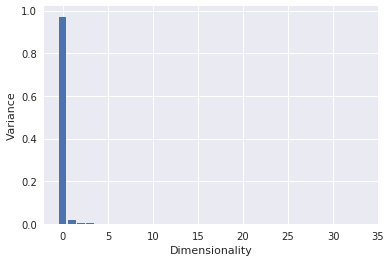

In [21]:
n=34 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(data)
eigenvalues = pca.explained_variance_ratio_
print (pca.explained_variance_ratio_)
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Variance")
plt.show()

In [22]:
df.head()

,Unnamed: 0,zipcode,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,...,pv_change_area,sub_change_area,taxi_change_area,fhv_change_area,log_fhv_taxi_change,renovation_index_with_rent,business_renewal,rent_increase,new_building_tbp,major_renovation_tbp
0,0,10001,-6.799685e-06,-7.715676e-05,-9.553277e-07,-0.005399,-0.061259,-0.000758,-0.478261,-0.402994,...,-0.180106,-0.833415,-0.169423,-0.000070,-1.376286,12.446914,0.533825,0.117905,0.050109,0.037876
1,1,10002,2.435300e-06,8.751860e-07,-4.946703e-07,0.000787,0.000283,-0.000160,0.205788,0.027545,...,-0.034884,0.027568,-0.040357,0.006078,2.194057,10.818387,0.473819,0.128549,0.055533,0.048182
2,2,10003,-9.138664e-06,-2.117338e-05,-8.366383e-07,-0.002541,-0.005888,-0.000233,-0.614719,-0.178030,...,-0.204036,-0.372674,-0.218571,0.031182,1.403509,6.758775,0.420635,0.165324,0.012487,0.041865
3,3,10004,6.246063e-06,1.773882e-05,1.499055e-06,0.011431,0.032465,0.002743,5.000000,0.572581,...,-0.032957,2.800295,-0.047086,0.004811,3.696351,9.302646,0.496063,0.160638,0.010390,0.021935
4,4,10005,9.601992e-07,4.320896e-06,1.440299e-06,0.000247,0.001110,0.000370,1.000000,0.101124,...,-0.136417,-3.080543,-0.161191,0.017093,2.731062,8.584642,0.388889,0.109913,0.000870,0.027834


In [88]:
X = df.iloc[:,2:35]

Y = df[["renovation_index_with_rent"]]



In [89]:
X.head()

,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,robbery_change_rate,SS_change_rate,H_change_rate,N_change_rate,T_change_rate,PHS_change_rate,VP_change_rate,SS_change_pop,H_change_pop,N_change_pop,T_change_pop,PHS_change_pop,VP_change_pop,SS_change_area,H_change_area,N_change_area,T_change_area,PHS_change_area,VP_change_area,MasterCard_growth_rank,pv_change_area,sub_change_area,taxi_change_area,fhv_change_area,log_fhv_taxi_change
0,-6.799685e-06,-7.715676e-05,-9.553277e-07,-0.005399,-0.061259,-0.000758,-0.478261,-0.402994,-0.173469,0.086226,0.202405,0.733872,1.653846,1.223684,-0.157601,0.743765,0.540758,9.801008,1.918529,2.074689,-2.520858,0.936783,0.681092,12.344520,2.416417,2.613102,-3.175060,446.31,-0.180106,-0.833415,-0.169423,-0.000070,-1.376286
1,2.435300e-06,8.751860e-07,-4.946703e-07,0.000787,0.000283,-0.000160,0.205788,0.027545,-0.071429,0.365812,0.079400,0.890855,-0.162850,0.431624,-0.192208,1.246295,0.195314,11.143226,-0.393580,0.621118,-0.455077,3.855765,0.604259,34.474717,-1.217650,1.921604,-1.407908,635.54,-0.034884,0.027568,-0.040357,0.006078,2.194057
2,-9.138664e-06,-2.117338e-05,-8.366383e-07,-0.002541,-0.005888,-0.000233,-0.614719,-0.178030,-0.134021,0.105930,-0.135309,0.525909,0.097826,0.619318,0.379032,0.459394,-0.342353,6.418805,0.080533,0.975339,2.102795,1.652039,-1.231145,23.082849,0.289606,3.507445,7.561923,342.43,-0.204036,-0.372674,-0.218571,0.031182,1.403509
3,6.246063e-06,1.773882e-05,1.499055e-06,0.011431,0.032465,0.002743,5.000000,0.572581,1.000000,-0.294351,0.000000,0.348636,-0.490385,1.636364,-0.573427,-11.888432,0.000000,3.507087,-11.659808,4.115226,-18.747142,-1.918033,0.000000,0.565820,-1.881148,0.663935,-3.024591,695.11,-0.032957,2.800295,-0.047086,0.004811,3.696351
4,9.601992e-07,4.320896e-06,1.440299e-06,0.000247,0.001110,0.000370,1.000000,0.101124,1.000000,-0.406610,-0.146982,0.611820,-0.142857,1.666667,-0.469565,-5.099297,-0.138152,3.371161,-0.555076,0.308375,-3.330455,-19.847317,-0.537712,13.121122,-2.160448,1.200249,-12.962689,424.63,-0.136417,-3.080543,-0.161191,0.017093,2.731062


In [90]:
data = pd.DataFrame(np.concatenate((Y,X),axis=1))
data.head()
print (data.shape)

(178, 34)


[  9.54021613e-01   2.05458640e-02   1.52963931e-02   4.06118366e-03
   1.85335645e-03   1.17423017e-03   7.82516696e-04   5.18102442e-04
   3.44615230e-04   2.67810168e-04   2.19228400e-04   1.96182207e-04
   1.47890277e-04   1.32645589e-04   9.38587375e-05   9.25077174e-05
   7.42307945e-05   5.34047565e-05   4.90394606e-05   2.65763301e-05
   2.16141060e-05   1.18374245e-05   5.44048807e-06   5.03020661e-06
   3.45505597e-06   1.22103096e-06   1.45863821e-07   4.30760666e-09
   1.90982578e-09   1.74719613e-10   1.28746018e-11   7.09040612e-16
   2.00644003e-16   1.79215808e-17]


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


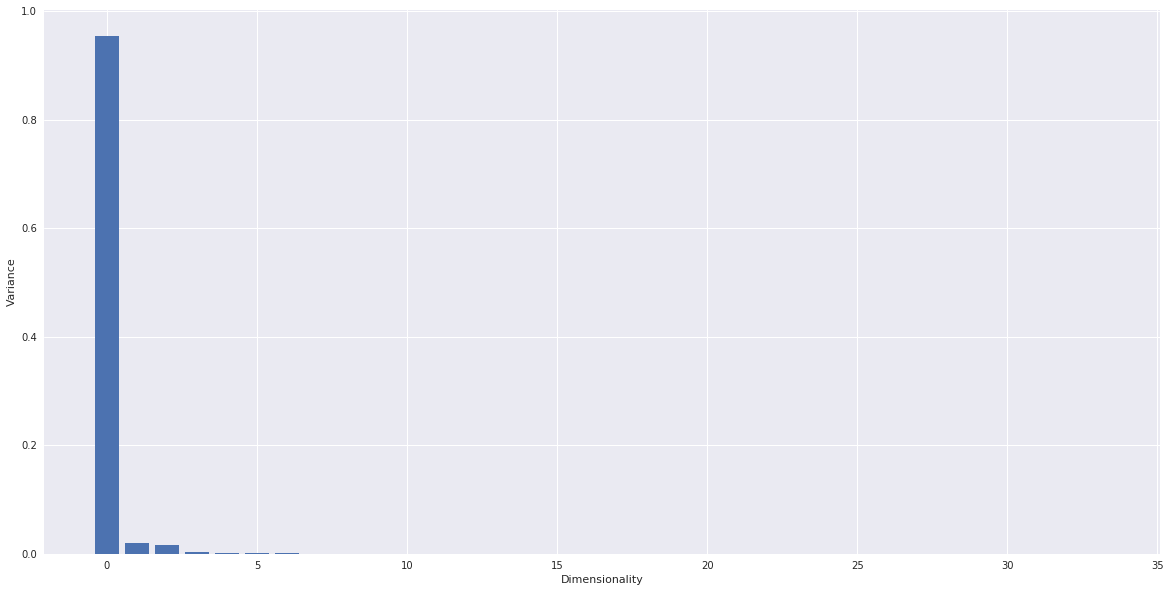

In [91]:
n=34 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(data)
eigenvalues = pca.explained_variance_ratio_
print (pca.explained_variance_ratio_)
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Variance")
plt.show()

# Let's try Linear Support Vector Classification to do some feature selection

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC


## First for the gentrification index

In [93]:
Y=Y.astype('int')
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape



/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(178, 7)

In [94]:
X_new = pd.DataFrame(X_new)

In [95]:
X_new.head()

,0,1,2,3,4,5,6
0,9.801008,2.074689,-2.520858,12.344520,2.416417,-3.175060,446.31
1,11.143226,0.621118,-0.455077,34.474717,-1.217650,-1.407908,635.54
2,6.418805,0.975339,2.102795,23.082849,0.289606,7.561923,342.43
3,3.507087,4.115226,-18.747142,0.565820,-1.881148,-3.024591,695.11
4,3.371161,0.308375,-3.330455,13.121122,-2.160448,-12.962689,424.63


In [31]:
pd.set_option('display.max_columns', None)

In [32]:
X.head()

,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,robbery_change_rate,SS_change_rate,H_change_rate,N_change_rate,T_change_rate,PHS_change_rate,VP_change_rate,SS_change_pop,H_change_pop,N_change_pop,T_change_pop,PHS_change_pop,VP_change_pop,SS_change_area,H_change_area,N_change_area,T_change_area,PHS_change_area,VP_change_area,MasterCard_growth_rank,pv_change_area,sub_change_area,taxi_change_area,fhv_change_area,log_fhv_taxi_change
0,-6.799685e-06,-7.715676e-05,-9.553277e-07,-0.005399,-0.061259,-0.000758,-0.478261,-0.402994,-0.173469,0.086226,0.202405,0.733872,1.653846,1.223684,-0.157601,0.743765,0.540758,9.801008,1.918529,2.074689,-2.520858,0.936783,0.681092,12.344520,2.416417,2.613102,-3.175060,446.31,-0.180106,-0.833415,-0.169423,-0.000070,-1.376286
1,2.435300e-06,8.751860e-07,-4.946703e-07,0.000787,0.000283,-0.000160,0.205788,0.027545,-0.071429,0.365812,0.079400,0.890855,-0.162850,0.431624,-0.192208,1.246295,0.195314,11.143226,-0.393580,0.621118,-0.455077,3.855765,0.604259,34.474717,-1.217650,1.921604,-1.407908,635.54,-0.034884,0.027568,-0.040357,0.006078,2.194057
2,-9.138664e-06,-2.117338e-05,-8.366383e-07,-0.002541,-0.005888,-0.000233,-0.614719,-0.178030,-0.134021,0.105930,-0.135309,0.525909,0.097826,0.619318,0.379032,0.459394,-0.342353,6.418805,0.080533,0.975339,2.102795,1.652039,-1.231145,23.082849,0.289606,3.507445,7.561923,342.43,-0.204036,-0.372674,-0.218571,0.031182,1.403509
3,6.246063e-06,1.773882e-05,1.499055e-06,0.011431,0.032465,0.002743,5.000000,0.572581,1.000000,-0.294351,0.000000,0.348636,-0.490385,1.636364,-0.573427,-11.888432,0.000000,3.507087,-11.659808,4.115226,-18.747142,-1.918033,0.000000,0.565820,-1.881148,0.663935,-3.024591,695.11,-0.032957,2.800295,-0.047086,0.004811,3.696351
4,9.601992e-07,4.320896e-06,1.440299e-06,0.000247,0.001110,0.000370,1.000000,0.101124,1.000000,-0.406610,-0.146982,0.611820,-0.142857,1.666667,-0.469565,-5.099297,-0.138152,3.371161,-0.555076,0.308375,-3.330455,-19.847317,-0.537712,13.121122,-2.160448,1.200249,-12.962689,424.63,-0.136417,-3.080543,-0.161191,0.017093,2.731062


# Variables selected by LSVC feature selection for renovation index with rent
Master Card
N_Change_pop
VP change area
PHS_change_pop
VP_change_pop
N_change_area
T_Change_area



In [98]:
lm1 = smf.ols('renovation_index_with_rent ~  MasterCard_growth_rank + N_change_pop + VP_change_pop + PHS_change_pop + T_change_area',data=df).fit()


lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     renovation_index_with_rent   R-squared:                       0.162
Model:                                    OLS   Adj. R-squared:                  0.137
Method:                         Least Squares   F-statistic:                     6.634
Date:                        Mon, 16 Jul 2018   Prob (F-statistic):           1.13e-05
Time:                                16:03:15   Log-Likelihood:                -708.64
No. Observations:                         178   AIC:                             1429.
Df Residuals:                             172   BIC:                             1448.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  6.1820      5.254      1.177      0.241        -4.188    16.552
MasterCard_growth_rank     0.0328      0.011      2.923      0.004         0.011     0.055
N_change_pop              -0.2179      0.216     -1.010      0.314        -0.644     0.208
VP_change_pop              1.3832      0.371      3.732      0.000         0.652     2.115
PHS_change_pop             0.2407      0.253      0.951      0.343        -0.259     0.741
T_change_area              0.3233      0.193      1.673      0.096        -0.058     0.705
==============================================================================
Omnibus:                       85.928   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              427.749
Skew:                           1.787   Prob(JB):                     1.30e-93
Kurtosis:                       9.701   Cond. No.                     2.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now for the business renewal

In [34]:
Y = df[["business_renewal"]]

In [35]:
type(df.business_renewal.iloc[1])

numpy.float64

In [36]:
Y.business_renewal = Y.business_renewal * 1000

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [37]:
Y=Y.astype('int')
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(178, 5)

In [38]:
X_new = pd.DataFrame(X_new)

In [39]:
X_new.head()

,0,1,2,3,4
0,2.074689,-2.520858,12.344520,2.416417,446.31
1,0.621118,-0.455077,34.474717,-1.217650,635.54
2,0.975339,2.102795,23.082849,0.289606,342.43
3,4.115226,-18.747142,0.565820,-1.881148,695.11
4,0.308375,-3.330455,13.121122,-2.160448,424.63


In [40]:
X.head()

,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,robbery_change_rate,SS_change_rate,H_change_rate,N_change_rate,T_change_rate,PHS_change_rate,VP_change_rate,SS_change_pop,H_change_pop,N_change_pop,T_change_pop,PHS_change_pop,VP_change_pop,SS_change_area,H_change_area,N_change_area,T_change_area,PHS_change_area,VP_change_area,MasterCard_growth_rank,pv_change_area,sub_change_area,taxi_change_area,fhv_change_area,log_fhv_taxi_change
0,-6.799685e-06,-7.715676e-05,-9.553277e-07,-0.005399,-0.061259,-0.000758,-0.478261,-0.402994,-0.173469,0.086226,0.202405,0.733872,1.653846,1.223684,-0.157601,0.743765,0.540758,9.801008,1.918529,2.074689,-2.520858,0.936783,0.681092,12.344520,2.416417,2.613102,-3.175060,446.31,-0.180106,-0.833415,-0.169423,-0.000070,-1.376286
1,2.435300e-06,8.751860e-07,-4.946703e-07,0.000787,0.000283,-0.000160,0.205788,0.027545,-0.071429,0.365812,0.079400,0.890855,-0.162850,0.431624,-0.192208,1.246295,0.195314,11.143226,-0.393580,0.621118,-0.455077,3.855765,0.604259,34.474717,-1.217650,1.921604,-1.407908,635.54,-0.034884,0.027568,-0.040357,0.006078,2.194057
2,-9.138664e-06,-2.117338e-05,-8.366383e-07,-0.002541,-0.005888,-0.000233,-0.614719,-0.178030,-0.134021,0.105930,-0.135309,0.525909,0.097826,0.619318,0.379032,0.459394,-0.342353,6.418805,0.080533,0.975339,2.102795,1.652039,-1.231145,23.082849,0.289606,3.507445,7.561923,342.43,-0.204036,-0.372674,-0.218571,0.031182,1.403509
3,6.246063e-06,1.773882e-05,1.499055e-06,0.011431,0.032465,0.002743,5.000000,0.572581,1.000000,-0.294351,0.000000,0.348636,-0.490385,1.636364,-0.573427,-11.888432,0.000000,3.507087,-11.659808,4.115226,-18.747142,-1.918033,0.000000,0.565820,-1.881148,0.663935,-3.024591,695.11,-0.032957,2.800295,-0.047086,0.004811,3.696351
4,9.601992e-07,4.320896e-06,1.440299e-06,0.000247,0.001110,0.000370,1.000000,0.101124,1.000000,-0.406610,-0.146982,0.611820,-0.142857,1.666667,-0.469565,-5.099297,-0.138152,3.371161,-0.555076,0.308375,-3.330455,-19.847317,-0.537712,13.121122,-2.160448,1.200249,-12.962689,424.63,-0.136417,-3.080543,-0.161191,0.017093,2.731062


# Variables selected by LSVC feature selection for Business Renewall

PHS_change_pop, VP_change_pop, N_change_area, T_Change_area, MasterCard_growth_rank


In [58]:
lm1 = smf.ols('business_renewal ~ MasterCard_growth_rank + N_change_area + T_change_area + PHS_change_pop + VP_change_pop',data=df).fit()


lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_renewal   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     33.07
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           1.49e-23
Time:                        13:22:26   Log-Likelihood:                 158.10
No. Observations:                 178   AIC:                            -304.2
Df Residuals:                     172   BIC:                            -285.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0.2662      0.040      6.665      0.000         0.187     0.345
MasterCard_growth_rank     0.0004   8.22e-05      4.306      0.000         0.000     0.001
N_change_area              0.0042      0.001      7.001      0.000         0.003     0.005
T_change_area              0.0092      0.001      6.200      0.000         0.006     0.012
PHS_change_pop             0.0025      0.002      1.335      0.184        -0.001     0.006
VP_change_pop             -0.0016      0.003     -0.553      0.581        -0.007     0.004
==============================================================================
Omnibus:                       16.115   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.355
Skew:                           0.316   Prob(JB):                     2.85e-09
Kurtosis:                       5.215   Cond. No.                     2.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now for rent increase

In [59]:
X2 = df.iloc[:,2:35]

Y2 = df[["rent_increase"]]

In [60]:
Y2.rent_increase = Y2.rent_increase * 1000

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [61]:
Y2=Y2.astype('int')
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X2, Y2)
model = SelectFromModel(lsvc, prefit=True)
X2_new = model.transform(X2)
X2_new.shape


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(178, 6)

In [62]:
X2_new = pd.DataFrame(X2_new)

In [63]:
X2_new.head()

,0,1,2,3,4,5
0,9.801008,2.074689,-2.520858,12.344520,2.416417,446.31
1,11.143226,0.621118,-0.455077,34.474717,-1.217650,635.54
2,6.418805,0.975339,2.102795,23.082849,0.289606,342.43
3,3.507087,4.115226,-18.747142,0.565820,-1.881148,695.11
4,3.371161,0.308375,-3.330455,13.121122,-2.160448,424.63


In [64]:
X.head()

,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,robbery_change_rate,SS_change_rate,H_change_rate,N_change_rate,T_change_rate,PHS_change_rate,VP_change_rate,SS_change_pop,H_change_pop,N_change_pop,T_change_pop,PHS_change_pop,VP_change_pop,SS_change_area,H_change_area,N_change_area,T_change_area,PHS_change_area,VP_change_area,MasterCard_growth_rank,pv_change_area,sub_change_area,taxi_change_area,fhv_change_area,log_fhv_taxi_change
0,-6.799685e-06,-7.715676e-05,-9.553277e-07,-0.005399,-0.061259,-0.000758,-0.478261,-0.402994,-0.173469,0.086226,0.202405,0.733872,1.653846,1.223684,-0.157601,0.743765,0.540758,9.801008,1.918529,2.074689,-2.520858,0.936783,0.681092,12.344520,2.416417,2.613102,-3.175060,446.31,-0.180106,-0.833415,-0.169423,-0.000070,-1.376286
1,2.435300e-06,8.751860e-07,-4.946703e-07,0.000787,0.000283,-0.000160,0.205788,0.027545,-0.071429,0.365812,0.079400,0.890855,-0.162850,0.431624,-0.192208,1.246295,0.195314,11.143226,-0.393580,0.621118,-0.455077,3.855765,0.604259,34.474717,-1.217650,1.921604,-1.407908,635.54,-0.034884,0.027568,-0.040357,0.006078,2.194057
2,-9.138664e-06,-2.117338e-05,-8.366383e-07,-0.002541,-0.005888,-0.000233,-0.614719,-0.178030,-0.134021,0.105930,-0.135309,0.525909,0.097826,0.619318,0.379032,0.459394,-0.342353,6.418805,0.080533,0.975339,2.102795,1.652039,-1.231145,23.082849,0.289606,3.507445,7.561923,342.43,-0.204036,-0.372674,-0.218571,0.031182,1.403509
3,6.246063e-06,1.773882e-05,1.499055e-06,0.011431,0.032465,0.002743,5.000000,0.572581,1.000000,-0.294351,0.000000,0.348636,-0.490385,1.636364,-0.573427,-11.888432,0.000000,3.507087,-11.659808,4.115226,-18.747142,-1.918033,0.000000,0.565820,-1.881148,0.663935,-3.024591,695.11,-0.032957,2.800295,-0.047086,0.004811,3.696351
4,9.601992e-07,4.320896e-06,1.440299e-06,0.000247,0.001110,0.000370,1.000000,0.101124,1.000000,-0.406610,-0.146982,0.611820,-0.142857,1.666667,-0.469565,-5.099297,-0.138152,3.371161,-0.555076,0.308375,-3.330455,-19.847317,-0.537712,13.121122,-2.160448,1.200249,-12.962689,424.63,-0.136417,-3.080543,-0.161191,0.017093,2.731062


# The variables selected by LSVC for rent increase are:

N_change_pop, PHS_change_pop, VP_change_pop, N_change_area, T_change_area and MasterCard_growth_rank

In [65]:
lm1 = smf.ols('rent_increase ~ MasterCard_growth_rank + T_change_area + N_change_pop + PHS_change_pop + VP_change_pop',data=df).fit()


lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          rent_increase   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     3.096
Date:                Mon, 16 Jul 2018   Prob (F-statistic):             0.0106
Time:                        13:27:16   Log-Likelihood:                 219.39
No. Observations:                 178   AIC:                            -426.8
Df Residuals:                     172   BIC:                            -407.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0.1690      0.029      5.912      0.000         0.113     0.225
MasterCard_growth_rank  1.314e-05    6.1e-05      0.215      0.830        -0.000     0.000
T_change_area              0.0022      0.001      2.134      0.034         0.000     0.004
N_change_pop               0.0004      0.001      0.318      0.751        -0.002     0.003
PHS_change_pop          7.138e-05      0.001      0.052      0.959        -0.003     0.003
VP_change_pop              0.0049      0.002      2.416      0.017         0.001     0.009
==============================================================================
Omnibus:                        0.399   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.819   Jarque-Bera (JB):                0.550
Skew:                          -0.052   Prob(JB):                        0.760
Kurtosis:                       2.748   Cond. No.                     2.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now we do it for New Building Permits devided by Total Permits

In [67]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'drug_change_area', 'larceny_change_area',
       'robbery_change_area', 'drug_change_pop', 'larceny_change_pop',
       'robbery_change_pop', 'drug_change_rate', 'petit_larceny_change_rate',
       'robbery_change_rate', 'SS_change_rate', 'H_change_rate',
       'N_change_rate', 'T_change_rate', 'PHS_change_rate', 'VP_change_rate',
       'SS_change_pop', 'H_change_pop', 'N_change_pop', 'T_change_pop',
       'PHS_change_pop', 'VP_change_pop', 'SS_change_area', 'H_change_area',
       'N_change_area', 'T_change_area', 'PHS_change_area', 'VP_change_area',
       'MasterCard_growth_rank', 'pv_change_area', 'sub_change_area',
       'taxi_change_area', 'fhv_change_area', 'log_fhv_taxi_change',
       'renovation_index_with_rent', 'business_renewal', 'rent_increase',
       'new_building_tbp', 'major_renovation_tbp'],
      dtype='object')

In [68]:
X3 = df.iloc[:,2:35]

Y3 = df[["new_building_tbp"]]

In [69]:
Y3.new_building_tbp = Y3.new_building_tbp * 1000000

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [70]:
Y3=Y3.astype('int')
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X3, Y3)
model = SelectFromModel(lsvc, prefit=True)
X3_new = model.transform(X3)
X3_new.shape


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(178, 5)

In [71]:
X3_new = pd.DataFrame(X3_new)
X3_new.head()

,0,1,2,3,4
0,2.074689,-2.520858,12.344520,2.416417,446.31
1,0.621118,-0.455077,34.474717,-1.217650,635.54
2,0.975339,2.102795,23.082849,0.289606,342.43
3,4.115226,-18.747142,0.565820,-1.881148,695.11
4,0.308375,-3.330455,13.121122,-2.160448,424.63


In [72]:
X.head()

,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,robbery_change_rate,SS_change_rate,H_change_rate,N_change_rate,T_change_rate,PHS_change_rate,VP_change_rate,SS_change_pop,H_change_pop,N_change_pop,T_change_pop,PHS_change_pop,VP_change_pop,SS_change_area,H_change_area,N_change_area,T_change_area,PHS_change_area,VP_change_area,MasterCard_growth_rank,pv_change_area,sub_change_area,taxi_change_area,fhv_change_area,log_fhv_taxi_change
0,-6.799685e-06,-7.715676e-05,-9.553277e-07,-0.005399,-0.061259,-0.000758,-0.478261,-0.402994,-0.173469,0.086226,0.202405,0.733872,1.653846,1.223684,-0.157601,0.743765,0.540758,9.801008,1.918529,2.074689,-2.520858,0.936783,0.681092,12.344520,2.416417,2.613102,-3.175060,446.31,-0.180106,-0.833415,-0.169423,-0.000070,-1.376286
1,2.435300e-06,8.751860e-07,-4.946703e-07,0.000787,0.000283,-0.000160,0.205788,0.027545,-0.071429,0.365812,0.079400,0.890855,-0.162850,0.431624,-0.192208,1.246295,0.195314,11.143226,-0.393580,0.621118,-0.455077,3.855765,0.604259,34.474717,-1.217650,1.921604,-1.407908,635.54,-0.034884,0.027568,-0.040357,0.006078,2.194057
2,-9.138664e-06,-2.117338e-05,-8.366383e-07,-0.002541,-0.005888,-0.000233,-0.614719,-0.178030,-0.134021,0.105930,-0.135309,0.525909,0.097826,0.619318,0.379032,0.459394,-0.342353,6.418805,0.080533,0.975339,2.102795,1.652039,-1.231145,23.082849,0.289606,3.507445,7.561923,342.43,-0.204036,-0.372674,-0.218571,0.031182,1.403509
3,6.246063e-06,1.773882e-05,1.499055e-06,0.011431,0.032465,0.002743,5.000000,0.572581,1.000000,-0.294351,0.000000,0.348636,-0.490385,1.636364,-0.573427,-11.888432,0.000000,3.507087,-11.659808,4.115226,-18.747142,-1.918033,0.000000,0.565820,-1.881148,0.663935,-3.024591,695.11,-0.032957,2.800295,-0.047086,0.004811,3.696351
4,9.601992e-07,4.320896e-06,1.440299e-06,0.000247,0.001110,0.000370,1.000000,0.101124,1.000000,-0.406610,-0.146982,0.611820,-0.142857,1.666667,-0.469565,-5.099297,-0.138152,3.371161,-0.555076,0.308375,-3.330455,-19.847317,-0.537712,13.121122,-2.160448,1.200249,-12.962689,424.63,-0.136417,-3.080543,-0.161191,0.017093,2.731062


# The variables selected by LSVC for rent increase are:

PHS_change_pop, VP_change_pop, N_change_area, T_change_area and MasterCard_growth_rank

In [80]:
lm1 = smf.ols('new_building_tbp ~ MasterCard_growth_rank + T_change_area +N_change_area+ PHS_change_pop + VP_change_pop',data=df).fit()


lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       new_building_tbp   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     12.22
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           3.85e-10
Time:                        13:40:09   Log-Likelihood:                 181.25
No. Observations:                 178   AIC:                            -350.5
Df Residuals:                     172   BIC:                            -331.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0.0347      0.035      0.991      0.323        -0.034     0.104
MasterCard_growth_rank     0.0002   7.22e-05      3.314      0.001      9.67e-05     0.000
T_change_area             -0.0018      0.001     -1.400      0.163        -0.004     0.001
N_change_area             -0.0025      0.001     -4.752      0.000        -0.004    -0.001
PHS_change_pop            -0.0033      0.002     -1.999      0.047        -0.007 -4.21e-05
VP_change_pop              0.0117      0.003      4.628      0.000         0.007     0.017
==============================================================================
Omnibus:                      102.820   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.826
Skew:                           2.088   Prob(JB):                    8.00e-152
Kurtosis:                      11.739   Cond. No.                     2.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now we do it for Major Renovation Permits devided by Total Permits

In [73]:
X4 = df.iloc[:,2:35]

Y4 = df[["major_renovation_tbp"]]

In [74]:
Y4.major_renovation_tbp = Y4.major_renovation_tbp * 1000000

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [75]:
Y4=Y4.astype('int')
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X4, Y4)
model = SelectFromModel(lsvc, prefit=True)
X4_new = model.transform(X4)
X4_new.shape


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(178, 5)

In [76]:
X4_new = pd.DataFrame(X4_new)
X4_new.head()

,0,1,2,3,4
0,2.074689,-2.520858,12.344520,2.416417,446.31
1,0.621118,-0.455077,34.474717,-1.217650,635.54
2,0.975339,2.102795,23.082849,0.289606,342.43
3,4.115226,-18.747142,0.565820,-1.881148,695.11
4,0.308375,-3.330455,13.121122,-2.160448,424.63


In [77]:
X.head()

,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,robbery_change_rate,SS_change_rate,H_change_rate,N_change_rate,T_change_rate,PHS_change_rate,VP_change_rate,SS_change_pop,H_change_pop,N_change_pop,T_change_pop,PHS_change_pop,VP_change_pop,SS_change_area,H_change_area,N_change_area,T_change_area,PHS_change_area,VP_change_area,MasterCard_growth_rank,pv_change_area,sub_change_area,taxi_change_area,fhv_change_area,log_fhv_taxi_change
0,-6.799685e-06,-7.715676e-05,-9.553277e-07,-0.005399,-0.061259,-0.000758,-0.478261,-0.402994,-0.173469,0.086226,0.202405,0.733872,1.653846,1.223684,-0.157601,0.743765,0.540758,9.801008,1.918529,2.074689,-2.520858,0.936783,0.681092,12.344520,2.416417,2.613102,-3.175060,446.31,-0.180106,-0.833415,-0.169423,-0.000070,-1.376286
1,2.435300e-06,8.751860e-07,-4.946703e-07,0.000787,0.000283,-0.000160,0.205788,0.027545,-0.071429,0.365812,0.079400,0.890855,-0.162850,0.431624,-0.192208,1.246295,0.195314,11.143226,-0.393580,0.621118,-0.455077,3.855765,0.604259,34.474717,-1.217650,1.921604,-1.407908,635.54,-0.034884,0.027568,-0.040357,0.006078,2.194057
2,-9.138664e-06,-2.117338e-05,-8.366383e-07,-0.002541,-0.005888,-0.000233,-0.614719,-0.178030,-0.134021,0.105930,-0.135309,0.525909,0.097826,0.619318,0.379032,0.459394,-0.342353,6.418805,0.080533,0.975339,2.102795,1.652039,-1.231145,23.082849,0.289606,3.507445,7.561923,342.43,-0.204036,-0.372674,-0.218571,0.031182,1.403509
3,6.246063e-06,1.773882e-05,1.499055e-06,0.011431,0.032465,0.002743,5.000000,0.572581,1.000000,-0.294351,0.000000,0.348636,-0.490385,1.636364,-0.573427,-11.888432,0.000000,3.507087,-11.659808,4.115226,-18.747142,-1.918033,0.000000,0.565820,-1.881148,0.663935,-3.024591,695.11,-0.032957,2.800295,-0.047086,0.004811,3.696351
4,9.601992e-07,4.320896e-06,1.440299e-06,0.000247,0.001110,0.000370,1.000000,0.101124,1.000000,-0.406610,-0.146982,0.611820,-0.142857,1.666667,-0.469565,-5.099297,-0.138152,3.371161,-0.555076,0.308375,-3.330455,-19.847317,-0.537712,13.121122,-2.160448,1.200249,-12.962689,424.63,-0.136417,-3.080543,-0.161191,0.017093,2.731062


# The variables selected by LSVC for rent increase are:

PHS_change_pop, VP_change_pop, N_change_area, T_change_area and MasterCard_growth_rank

In [81]:
lm1 = smf.ols('major_renovation_tbp ~ MasterCard_growth_rank + T_change_area +N_change_area+ PHS_change_pop + VP_change_pop',data=df).fit()


lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     major_renovation_tbp   R-squared:                       0.283
Model:                              OLS   Adj. R-squared:                  0.262
Method:                   Least Squares   F-statistic:                     13.58
Date:                  Mon, 16 Jul 2018   Prob (F-statistic):           3.63e-11
Time:                          13:40:39   Log-Likelihood:                 237.68
No. Observations:                   178   AIC:                            -463.4
Df Residuals:                       172   BIC:                            -444.3
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0.1501      0.026      5.878      0.000         0.100     0.201
MasterCard_growth_rank -7.397e-05   5.26e-05     -1.407      0.161        -0.000  2.98e-05
T_change_area             -0.0003      0.001     -0.274      0.784        -0.002     0.002
N_change_area             -0.0014      0.000     -3.594      0.000        -0.002    -0.001
PHS_change_pop             0.0007      0.001      0.595      0.552        -0.002     0.003
VP_change_pop              0.0104      0.002      5.633      0.000         0.007     0.014
==============================================================================
Omnibus:                       36.533   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.478
Skew:                           1.100   Prob(JB):                     5.45e-13
Kurtosis:                       4.667   Cond. No.                     2.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Finally a Correlation Matrix just to keep in mind

In [48]:
corr = df.iloc[:,2:].corr()

In [49]:
corr.iloc[33:,:33]

,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,robbery_change_rate,SS_change_rate,H_change_rate,N_change_rate,T_change_rate,PHS_change_rate,VP_change_rate,SS_change_pop,H_change_pop,N_change_pop,T_change_pop,PHS_change_pop,VP_change_pop,SS_change_area,H_change_area,N_change_area,T_change_area,PHS_change_area,VP_change_area,MasterCard_growth_rank,pv_change_area,sub_change_area,taxi_change_area,fhv_change_area,log_fhv_taxi_change
renovation_index_with_rent,-0.128257,0.047208,-0.304241,-0.150243,0.069052,-0.296740,-0.143715,0.060955,-0.249569,0.103269,-0.125451,0.213714,0.082986,0.084564,0.321935,0.068248,-0.147699,0.003162,0.263579,0.051995,0.287364,0.078233,-0.127759,-0.078362,0.258718,0.073313,0.399698,0.196211,0.286588,0.077365,0.423510,0.066150,-0.097853
business_renewal,-0.490008,0.046098,-0.531660,-0.402143,0.026603,-0.366293,-0.258108,-0.097960,-0.228463,0.036383,-0.155129,-0.164963,0.309884,0.057891,0.182880,-0.008558,-0.359515,0.460865,0.131826,0.127554,-0.049225,0.137627,-0.495815,0.496751,0.437429,0.326423,0.195321,0.459423,0.002802,0.087933,0.180035,-0.119821,0.093256
rent_increase,-0.131536,0.018664,-0.222696,-0.100945,0.034075,-0.217902,-0.069767,-0.008556,-0.234349,0.014009,0.000443,0.014586,0.141504,-0.163824,0.189870,0.063500,-0.062507,0.023746,0.266098,0.020925,0.227608,0.096954,-0.137122,0.009706,0.225769,-0.059040,0.328870,0.044226,0.156127,0.014993,0.278506,-0.015724,-0.085238
new_building_tbp,0.012344,0.058592,0.053709,-0.084733,0.062385,-0.062594,-0.118452,0.024889,-0.171929,-0.014225,-0.111591,0.304182,0.042792,-0.014913,0.421036,0.060022,-0.042109,-0.239002,0.190491,-0.174760,0.332475,-0.050509,0.128840,-0.345511,0.028954,-0.273245,0.311810,0.081532,0.108128,0.057298,0.416758,-0.144103,-0.023245
major_renovation_tbp,0.108338,0.011894,0.040383,0.091323,0.017306,-0.087022,-0.053722,0.077627,-0.276170,-0.065778,-0.082883,0.137241,0.018914,-0.173149,0.239482,0.136699,0.088527,-0.242193,0.284275,0.017840,0.448633,-0.001116,0.131684,-0.347125,0.055877,-0.159942,0.386978,-0.224888,0.118722,0.036315,0.375736,-0.112163,-0.193439


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


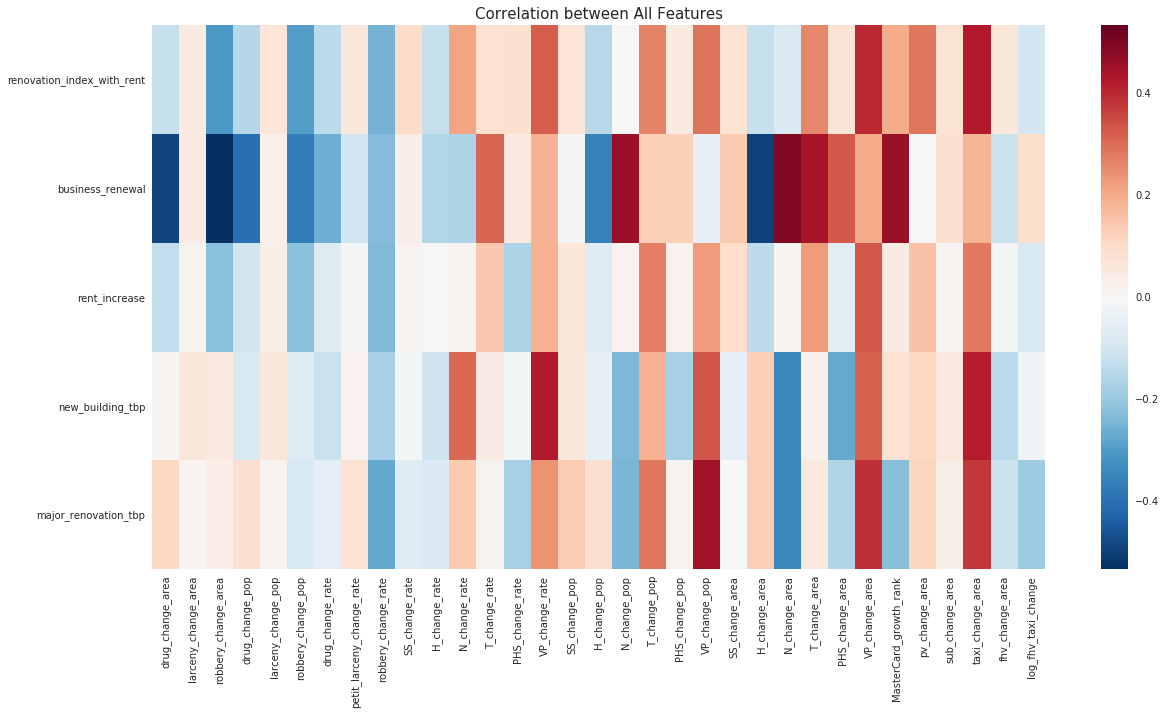

In [50]:
pl.figure=figsize(20,10)
seaborn_plot = seaborn.heatmap(corr.iloc[33:,:33], 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title('Correlation between All Features',fontsize = 15)